In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [5]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
columns = {'ph':1, 'Hardness':2, 'Solids':3, 'Chloramines':4, 'Sulfate':5, 'Conductivity':6,
           'Organic_carbon':7, 'Trihalomethanes':8, 'Turbidity':9, 'Potability':10}

In [20]:
df1 = df.fillna(df.median())

In [21]:
df1.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

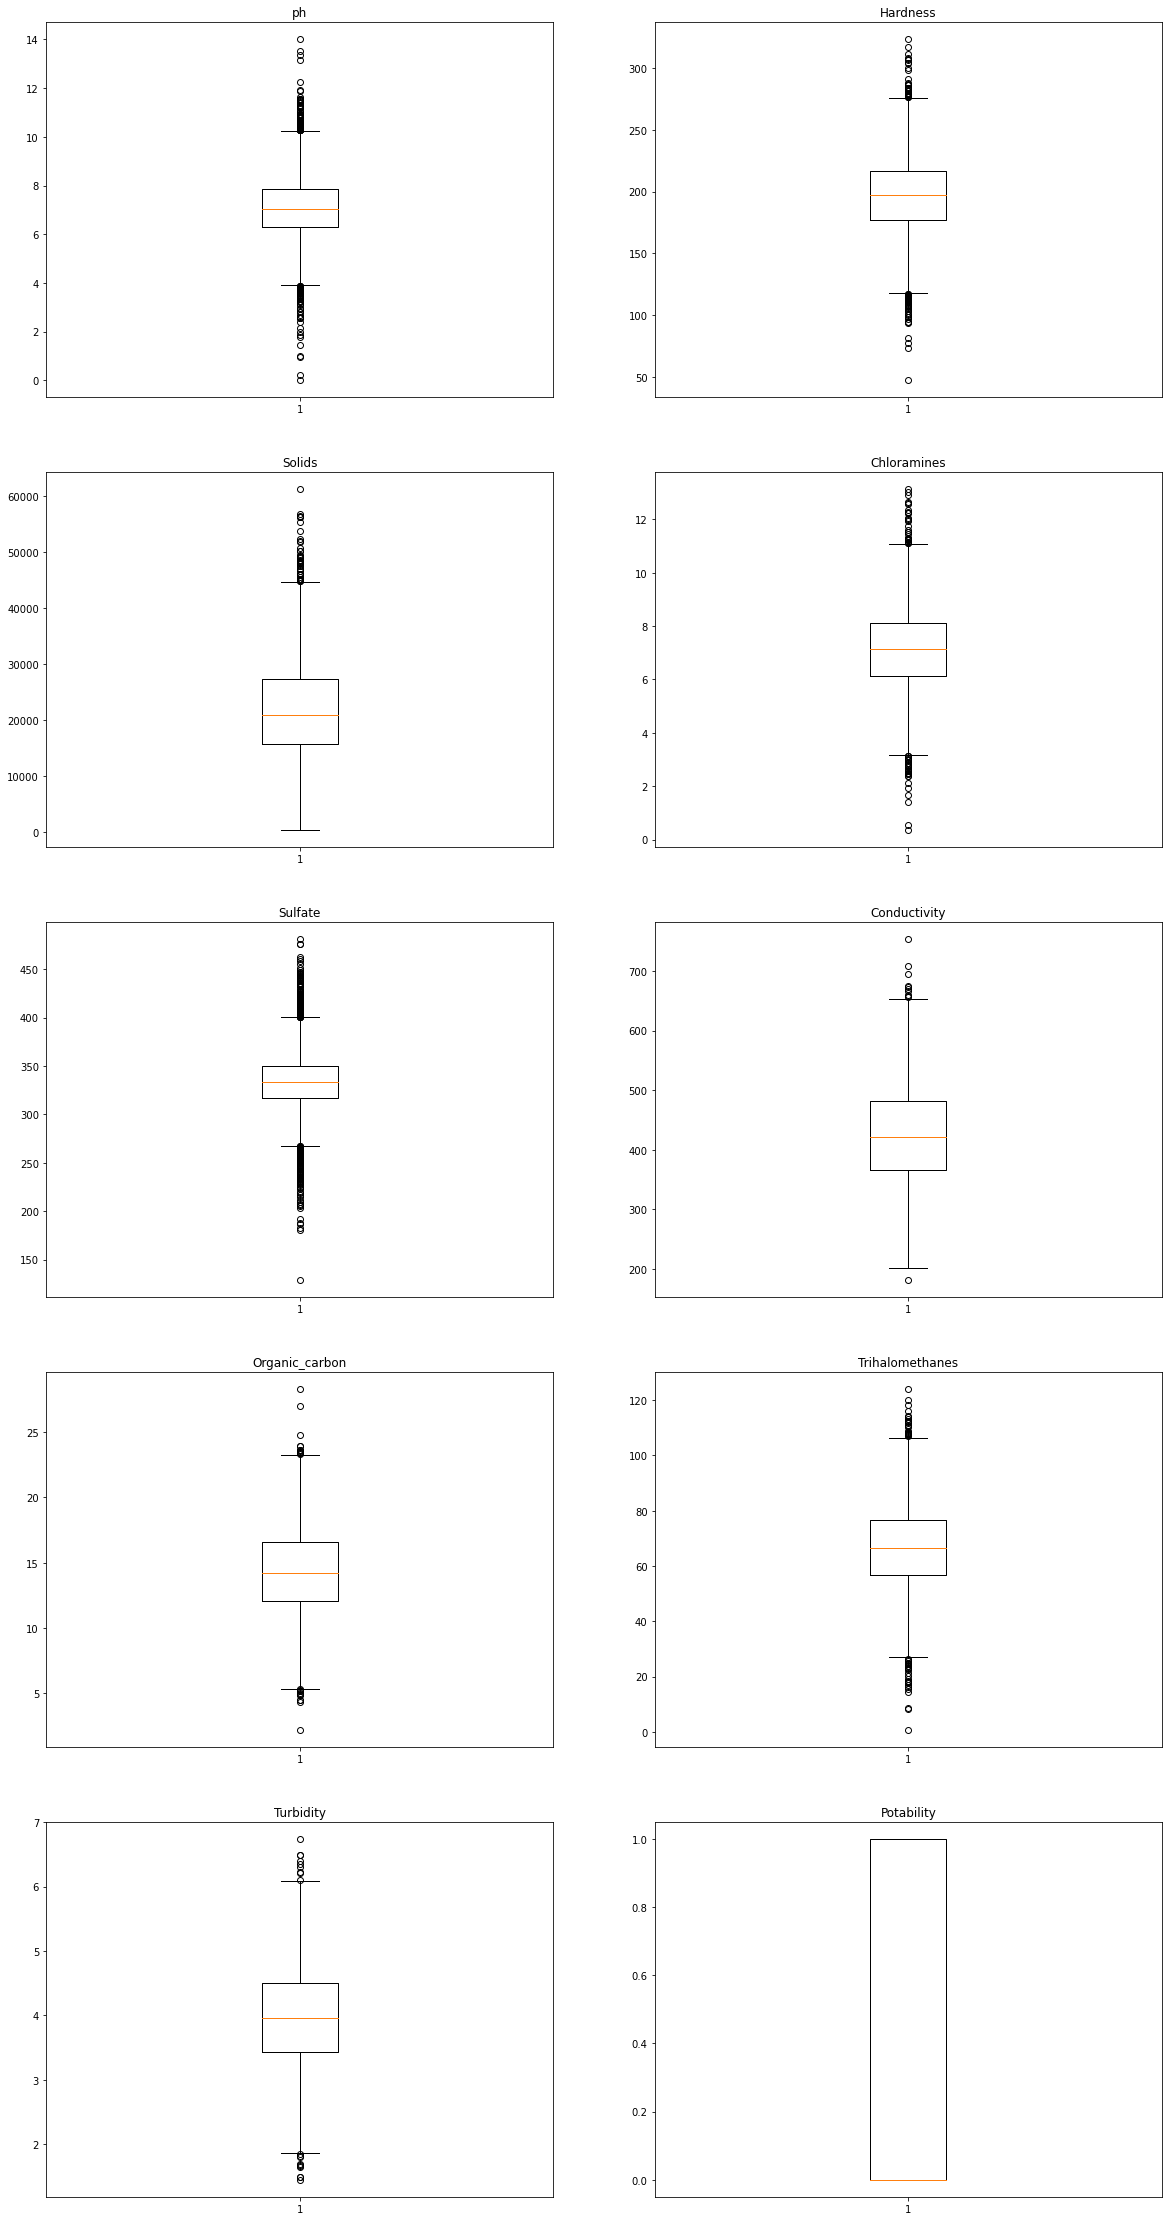

In [24]:
plt.figure(figsize =(20,40))
for var, i in columns.items():
    plt.subplot(5,2,i)
    plt.boxplot(df1[var])
    plt.title(var)
plt.show()

In [25]:
df1.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

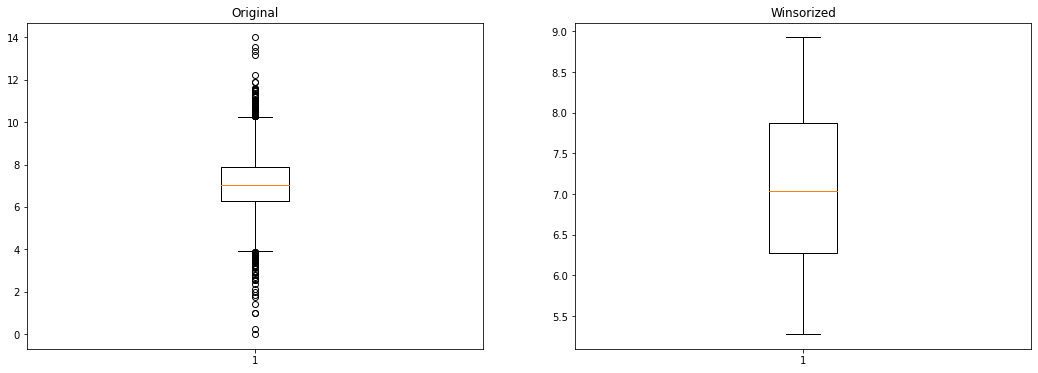

In [46]:
# winzorization
from scipy.stats.mstats import winsorize
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
original = df1['ph']
plt.boxplot(original)
plt.title("Original")

plt.subplot(1,2,2)
wins = winsorize(df1['ph'],(0.1, 0.1), inplace = True)
plt.boxplot(wins)
plt.title("Winsorized")
plt.show()

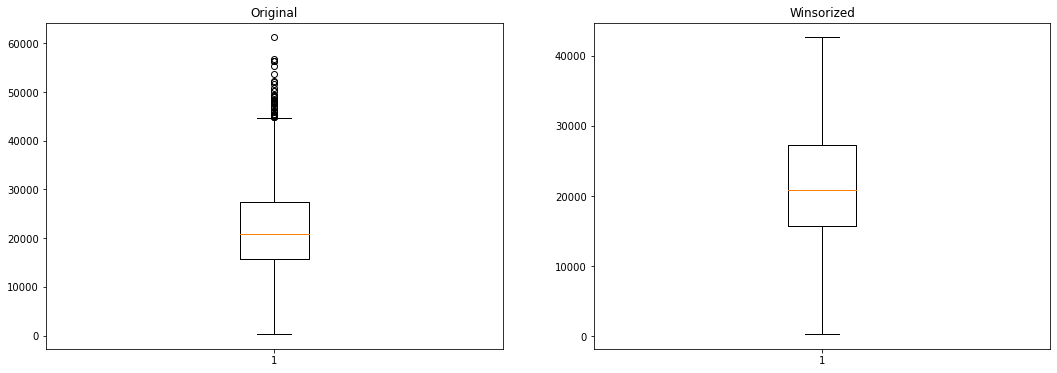

In [45]:
from scipy.stats.mstats import winsorize
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
original = df1['Solids']
plt.boxplot(original)
plt.title("Original")

plt.subplot(1,2,2)
wins = winsorize(df1['Solids'],(0, 0.02), inplace=True)
plt.boxplot(wins)
plt.title("Winsorized")
plt.show()

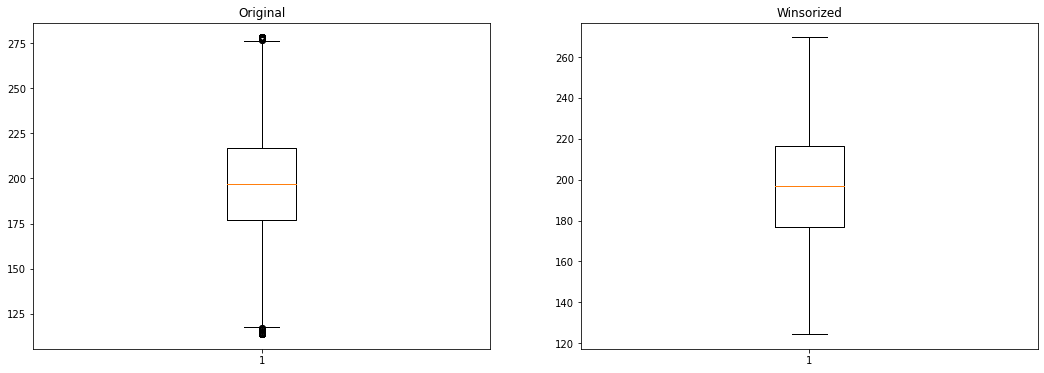

In [52]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
original = df1['Hardness']
plt.boxplot(original)
plt.title("Original")

plt.subplot(1,2,2)
wins = winsorize(df1['Hardness'],limits = (0.02,0.02), inplace = True)
plt.boxplot(wins)
plt.title("Winsorized")
plt.show()

In [ ]:
'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'

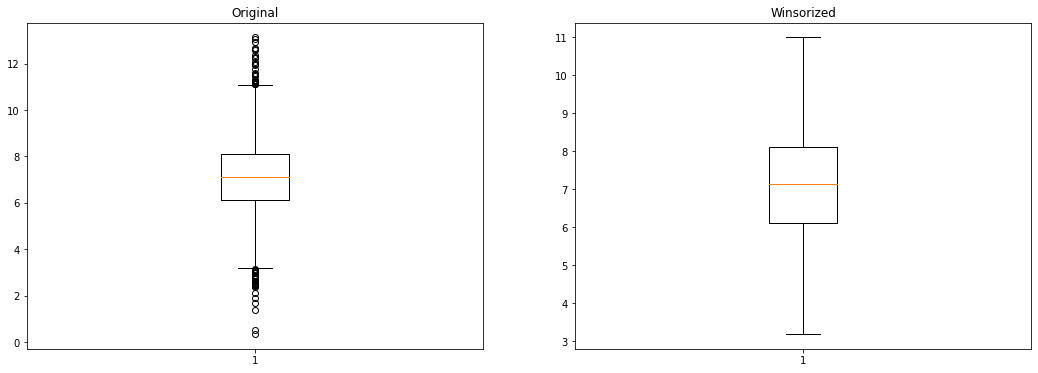

In [64]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
original = df1['Chloramines']
plt.boxplot(original)
plt.title("Original")

plt.subplot(1,2,2)
wins = winsorize(df1['Chloramines'],limits = (0.01,0.01), inplace = True)
plt.boxplot(wins)
plt.title("Winsorized")
plt.show()

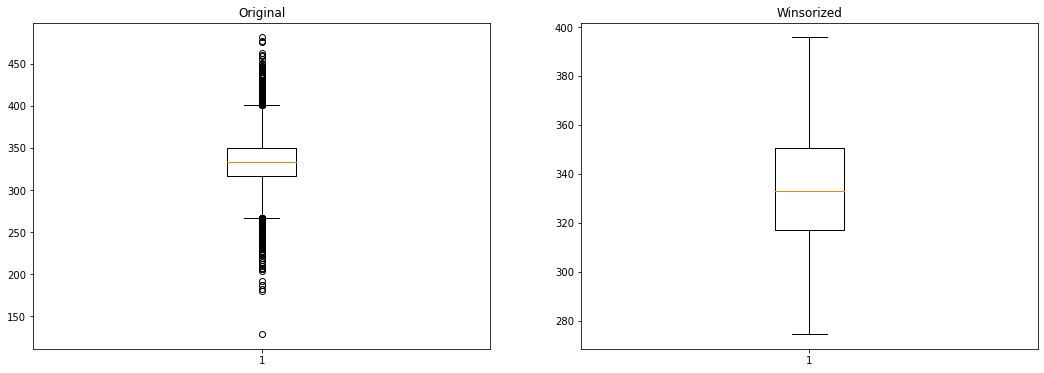

In [68]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
original = df1['Sulfate']
plt.boxplot(original)
plt.title("Original")

plt.subplot(1,2,2)
wins = winsorize(df1['Sulfate'],limits = (0.05,0.05), inplace = True)
plt.boxplot(wins)
plt.title("Winsorized")
plt.show()

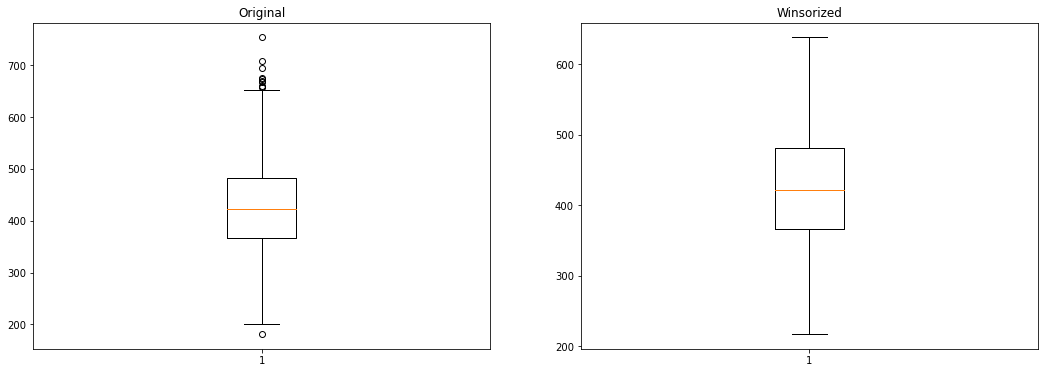

In [74]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
original = df1['Conductivity']
plt.boxplot(original)
plt.title("Original")

plt.subplot(1,2,2)
wins = winsorize(df1['Conductivity'],limits = (0.001,0.005), inplace = True)
plt.boxplot(wins)
plt.title("Winsorized")
plt.show()

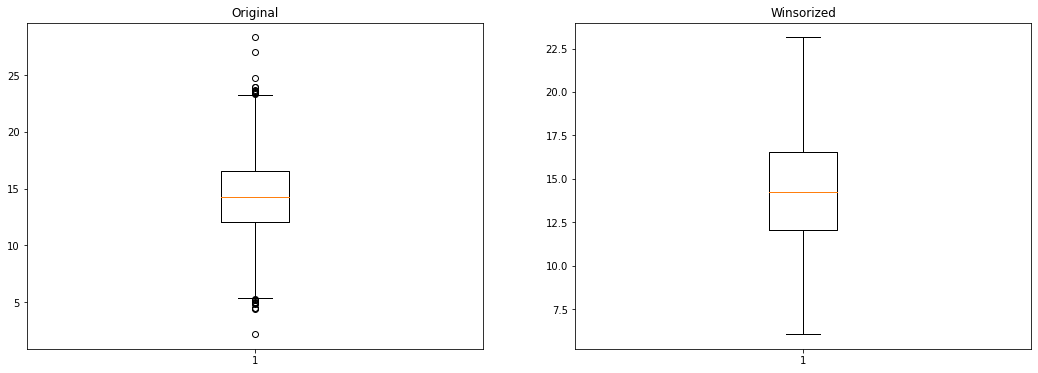

In [80]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
original = df1['Organic_carbon']
plt.boxplot(original)
plt.title("Original")

plt.subplot(1,2,2)
wins = winsorize(df1['Organic_carbon'],limits = (0.008,0.004), inplace=True)
plt.boxplot(wins)
plt.title("Winsorized")
plt.show()

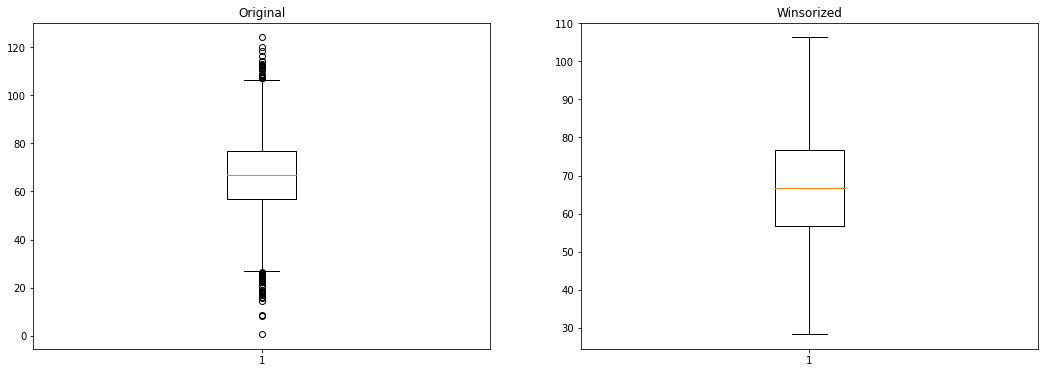

In [83]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
original = df1['Trihalomethanes']
plt.boxplot(original)
plt.title("Original")

plt.subplot(1,2,2)
wins = winsorize(df1['Trihalomethanes'],limits = (0.01,0.008), inplace = True)
plt.boxplot(wins)
plt.title("Winsorized")
plt.show()

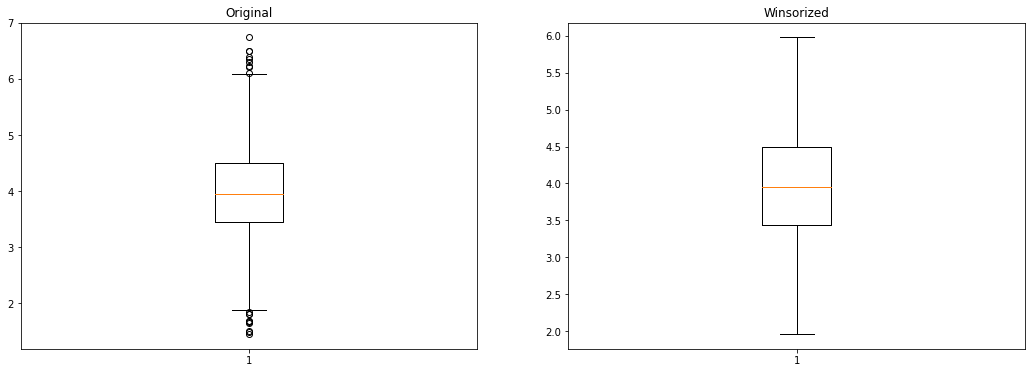

In [87]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
original = df1['Turbidity']
plt.boxplot(original)
plt.title("Original")

plt.subplot(1,2,2)
wins = winsorize(df1['Turbidity'],limits = (0.005,0.005), inplace = True)
plt.boxplot(wins)
plt.title("Winsorized")
plt.show()

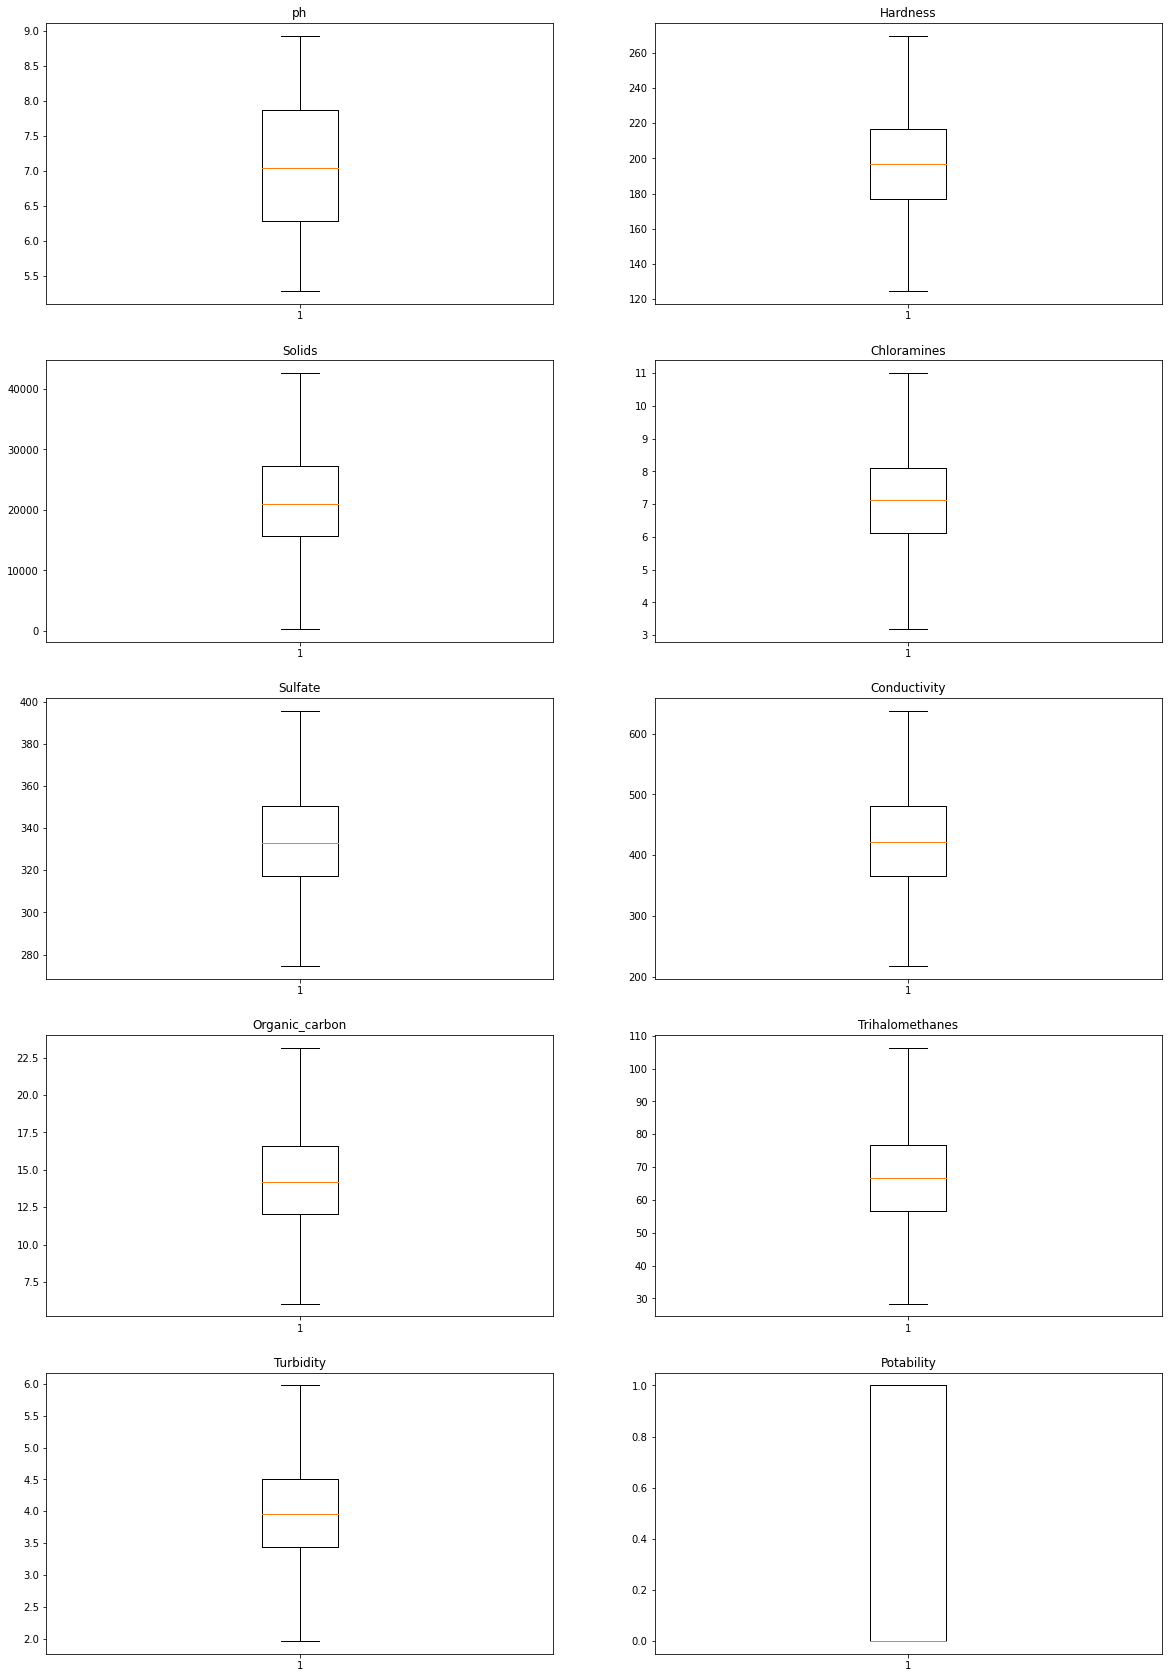

In [89]:
plt.figure(figsize=(20,30))
for var, i in columns.items():
    plt.subplot(5,2,i)
    plt.boxplot(df1[var])
    plt.title(var)
plt.show()

In [92]:
# Now we don't have any outliers
# Upsampling the target column
from imblearn.over_sampling import SMOTE
df1['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [93]:
# First let's splt
X = df1.drop(['Potability'], axis = 1)
y = df1['Potability']
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [94]:
x_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2128,5.514748,228.735924,35343.628580,4.346608,333.073546,526.112381,14.930982,46.780508,2.798158
1519,7.036752,210.732854,13671.416030,8.546187,395.728541,352.252328,10.353659,45.304007,3.364891
40,7.036752,233.858996,11703.923907,4.599388,309.039320,349.399633,18.338893,42.677465,3.510004
1151,5.280292,227.007086,7323.302301,7.490508,326.695199,412.896404,12.906730,68.748918,2.010537
2404,8.926113,217.372780,25175.754158,9.883946,329.174454,394.054835,20.277571,85.840258,2.615257


In [95]:
# scaling with min-max scaler
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [101]:
x_train

array([[0.06430802, 0.71854049, 0.82803072, ..., 0.51940403, 0.236114  ,
        0.20830739],
       [0.48177348, 0.59445849, 0.31564118, ..., 0.25129297, 0.21714613,
        0.34940571],
       [0.48177348, 0.75385008, 0.26912437, ..., 0.71901817, 0.18340425,
        0.38553426],
       ...,
       [0.37514547, 0.46425628, 0.35122048, ..., 0.54911877, 0.36139156,
        0.46514916],
       [0.65708696, 0.75000256, 0.55210797, ..., 0.7260772 , 0.41870242,
        0.7665692 ],
       [0.48177348, 0.25110606, 0.32206795, ..., 0.53567049, 0.60602328,
        0.54276964]])

In [107]:
from collections import Counter
counter = Counter(y_train)
print('Before: ',counter)
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)
counter = Counter(y_train_sm)
print('After: ',counter)

Before:  Counter({0: 1586, 1: 1034})
After:  Counter({0: 1586, 1: 1586})


In [110]:
# Applying algorithms
reg = RandomForestClassifier()
reg.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [111]:
reg_pred = reg.predict(x_test)

In [112]:
print(classification_report(y_test, reg_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       412
           1       0.54      0.43      0.48       244

    accuracy                           0.65       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.65      0.64       656



In [117]:
# cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [118]:
results = cross_val_score(reg, x_train, y_train, cv = StratifiedKFold(10))
print(results)
print(np.mean(results))

[0.69465649 0.66030534 0.66412214 0.68320611 0.66412214 0.61450382
 0.66412214 0.63740458 0.64503817 0.66030534]
0.6587786259541984


In [119]:
# other algorithm with grid search cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [149]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

In [135]:
para_knn = {'n_neighbors':np.arange(1,50)}
grid_knn = RandomizedSearchCV(knn, param_distributions = para_knn, cv = 5)
grid_knn.fit(x_train_sm, y_train_sm)
print("Best params for knn: ",grid_knn.best_params_)

Best params for knn:  {'n_neighbors': 2}


In [136]:
knn1 = KNeighborsClassifier(n_neighbors = 2)
knn1.fit(x_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=2)

In [137]:
knn1_pred = knn1_fit.predict(x_test)
print(classification_report(y_test, knn1_pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       412
           1       0.65      0.25      0.36       244

    accuracy                           0.67       656
   macro avg       0.66      0.58      0.57       656
weighted avg       0.66      0.67      0.62       656



In [133]:
para_rf = {'n_estimators':[100,200,350,500], 'min_samples_leaf' : [2,10,30]}

In [140]:
grid_rf = RandomizedSearchCV(rf, param_distributions= para_rf, cv=5)
grid_rf.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'min_samples_leaf': [2, 10, 30],
                                        'n_estimators': [100, 200, 350, 500]})

In [141]:
print("Best params for rf: ",grid_rf.best_params_)

Best params for rf:  {'n_estimators': 500, 'min_samples_leaf': 2}


In [143]:
rf1 = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 2)
rf1_fit = rf1.fit(x_train_sm, y_train_sm)

In [144]:
rf1_pred = rf1_fit.predict(x_test)
print(classification_report(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       412
           1       0.60      0.45      0.52       244

    accuracy                           0.69       656
   macro avg       0.66      0.64      0.64       656
weighted avg       0.68      0.69      0.67       656



In [180]:
# cross val score for randomforest with grid search cv
results1 = cross_val_score(rf1, x_train_sm, y_train_sm, cv = 10)
print(results1)
print(np.mean(results1))

[0.6918239  0.70440252 0.70977918 0.65299685 0.68769716 0.63091483
 0.74763407 0.829653   0.85173502 0.84227129]
0.7348907803106958


In [150]:
# with xgboost
para_xg = {'n_estimators':[50,100,250,400,600,800,100], 'learning_rate':[1.2,1.5,8,1]}


In [151]:
grid_xg = RandomizedSearchCV(xgb, param_distributions = para_xg, cv = 5)
grid_xg.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                      

In [178]:
xgb1 = XGBClassifier(learning_rate = 0.1,
                    n_estimators = 50, eval_metric = 'logloss', 
                     use_label_encoder=False)
xgb_fit = xgb1.fit(x_train_sm, y_train_sm)

In [179]:
xgb_pred = xgb_fit.predict(x_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       412
           1       0.55      0.49      0.52       244

    accuracy                           0.66       656
   macro avg       0.64      0.63      0.63       656
weighted avg       0.66      0.66      0.66       656



In [181]:
# cross val score for xgb
results2 = cross_val_score(xgb1, x_train_sm, y_train_sm, cv = 10)
print(results2)
print(np.mean(results2))

[0.66981132 0.63522013 0.65299685 0.61514196 0.67823344 0.61514196
 0.69716088 0.73501577 0.73501577 0.73501577]
0.6768753844017221


In [ ]:
# Random Forest works best